## Package installation
We start by installing all the necessary packages into our Python kernel. Pint is used for unit checking, scipy for constatns, numpy for mathematical operations and matplotlib along with open-atmos-jupyter-utils for plotting the resulting graph.

In [5]:
! pip install pint
! pip install scipy
! pip install numpy
! pip install matplotlib
! pip install open-atmos-jupyter-utils

In [1]:
import numpy as np
from scipy import constants
import pint
import matplotlib.pyplot as plt

![](equation.png)

## Variables
The implemented equation of c(x,t) is an analytical solution for the general diffusion formula. According to the generated outcome, the equation represents the change of density over time/space which in general can be interpreted as a spread of a signal across time and space.

- **x** - vector of values from 1 to 100 meters.
- **t** - vector of values from 1 to 100 seconds.

## Constants
The equation features several constants dictating the nature of the spreading signal. Again, to maintain simplicity within the given assignment, these were set to whole numbers. Because the generated result was satisfactory, these values were not modified later.

The units of these constants were chosen so that the equation's result matches the expected units. The notes explain exactly how each unit was sourced.

- **M** = 1 kg - mass
- **D** = 5 m^2/s - Diffusion Coefficient ([source](https://en.wikipedia.org/wiki/Mass_diffusivity))
- **A** = 1 m^3/s - derived from simplification of equation
- **u** = 1 m/s - derived from simplification of equation

In [ ]:
si = pint.UnitRegistry()

t = np.linspace(1, 100, 100) * si.s
M = 1 * si.kg
D = 5 * si.m**2 / si.s
x = np.linspace(1, 100, 100) * si.m
A = 1 * si.m ** 3 / si.s
u = 1 * si.m / si.s

5.0 meter ** 2 / second


## Implementation
Below is the c(x,t) equation implemented in Python.

In [3]:
def C(x,t):
    ans = np.zeros((len(x), len(t))) * si.kg / si.m **3

    for i in range(len(x)):
        for j in range(len(t)):
            ans[i,j] = (M/A) * (1/(2*np.sqrt(constants.pi * D))) * (x[i]/ t[j] ** (3/2)) * np.exp(-((u*t[j]-x[i])**2)/(4*D*t[j]))
    return ans

## Generated plot
The plot was generated for the value of **x** = 50m.

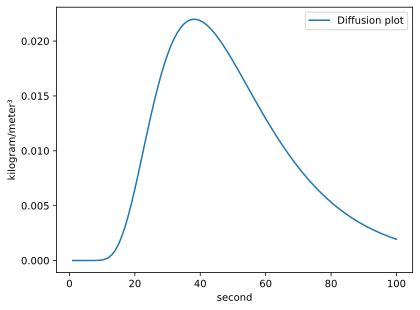

In [6]:
from open_atmos_jupyter_utils import show_plot

si.setup_matplotlib()

cxt = C(x, t)
plt.plot(t, cxt[50], label="Diffusion plot")
plt.legend()
show_plot()